In [ ]:
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [3]:
# 1

df=pd.read_csv("house_price.csv")
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [4]:
df2 = df.copy()
df2


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [5]:
print("Displaying first  rows:")
df2.head(10)

Displaying first  rows:


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274


In [6]:
df2.shape

(13200, 7)

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [8]:
df2.describe

<bound method NDFrame.describe of                        location       size  total_sqft  bath   price  bhk  \
0      Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1              Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2                   Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3            Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                      Kothanur      2 BHK      1200.0   2.0   51.00    2   
...                         ...        ...         ...   ...     ...  ...   
13195                Whitefield  5 Bedroom      3453.0   4.0  231.00    5   
13196                     other      4 BHK      3600.0   5.0  400.00    4   
13197     Raja Rajeshwari Nagar      2 BHK      1141.0   2.0   60.00    2   
13198           Padmanabhanagar      4 BHK      4689.0   4.0  488.00    4   
13199              Doddathoguru      1 BHK       550.0   1.0   17.00    1   

       price_per_sqft  
0                

In [9]:
missing_values = df2.isnull().sum()
print("Null values in each column:")
print(missing_values)

Null values in each column:
location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64


In [10]:
df2.duplicated().sum()

1049

In [11]:
df2.drop_duplicates(inplace=True)

In [12]:
df2.shape

(12151, 7)

# DETECTING OUTLIERS

### MEAN AND STANDARD DEVIATION

In [13]:
mean = df2['price_per_sqft'].mean()
std = df2['price_per_sqft'].std()
threshold = 3
lower_limit = mean - threshold * std
upper_limit = mean + threshold * std

df2_trimmed_MS = df2[(df2['price_per_sqft'] >= lower_limit) & (df2['price_per_sqft'] <= upper_limit)]

rows_cleared = len(df2) - len(df2_trimmed_MS)
print("The number of rows cleared:",rows_cleared)


The number of rows cleared: 5


### PERCENTILE METHOD

In [14]:
lower_limit = np.percentile(df2['price_per_sqft'], 5)
upper_limit = np.percentile(df2['price_per_sqft'], 95)

df2_trimmed_per = df2[(df2['price_per_sqft'] >= lower_limit) & (df2['price_per_sqft'] <= upper_limit)]

rows_cleared = len(df2) - len(df2_trimmed_per)
print("The number of rows cleared:",rows_cleared)

The number of rows cleared: 1211


### IQR

In [15]:
Q1 = df2['price_per_sqft'].quantile(0.25)
Q3 = df2['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

df2_trimmed_IQR = df2[(df2['price_per_sqft'] >= lower_limit) & (df2['price_per_sqft'] <= upper_limit)]

rows_cleared = len(df2) - len(df2_trimmed_IQR)
print("The number of rows cleared:",rows_cleared)

The number of rows cleared: 1142


### Z-SCORE 

In [16]:
from scipy.stats import zscore

df2['z_score'] = zscore(df2['price_per_sqft'])

critical_value = 3

df2_trimmed_z_score = df2[(df2['z_score'] > critical_value) | (df2['z_score'] < -critical_value)]

rows_cleared = len(df2) - len(df2_trimmed_z_score)
print("The number of rows cleared:",rows_cleared)

The number of rows cleared: 12146


In [17]:
df2

,location,size,total_sqft,bath,price,bhk,price_per_sqft,z_score
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.039861
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.031625
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.034412
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.016971
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.034907
...,...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530,-0.014409
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,-0.012979
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,0.026777
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.025845


### box plot of Actual data

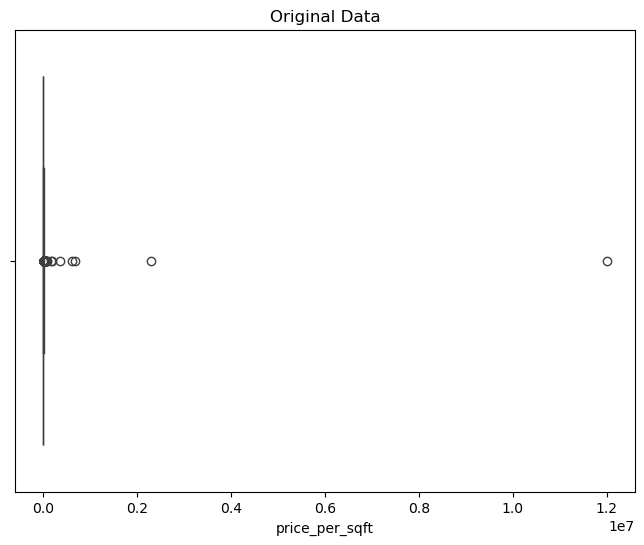

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df2['price_per_sqft'])
plt.title('Original Data')
plt.show()

### MEAN AND STANDARD DEVIATION

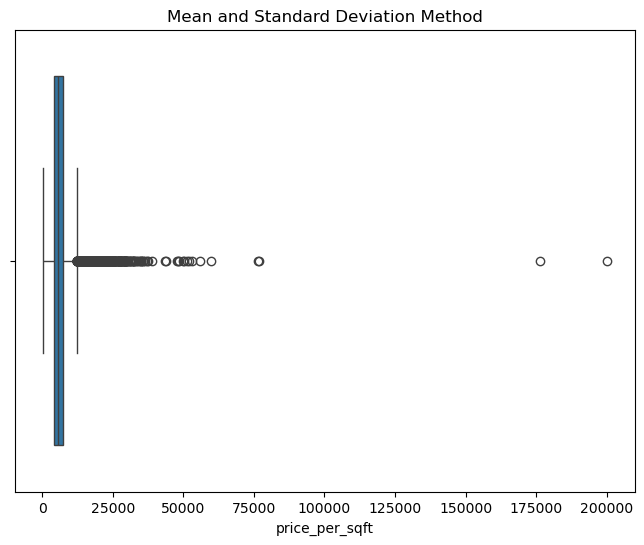

In [19]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df2_trimmed_MS['price_per_sqft'])
plt.title('Mean and Standard Deviation Method')
plt.show()

### PERCENTILE PLOT

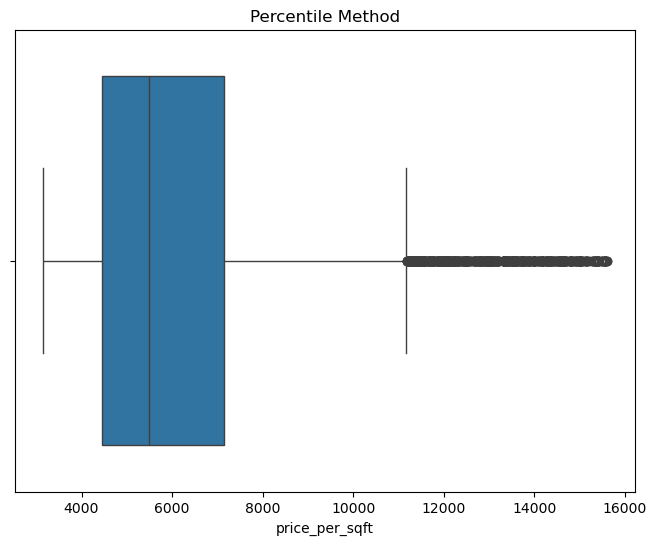

In [20]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df2_trimmed_per['price_per_sqft'])
plt.title('Percentile Method')
plt.show()


### IQR

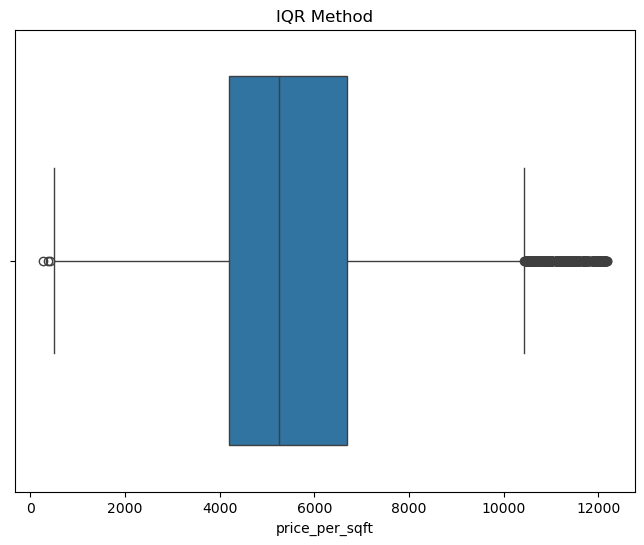

In [21]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df2_trimmed_IQR['price_per_sqft'])
plt.title('IQR Method')
plt.show()

### Z-SCORE

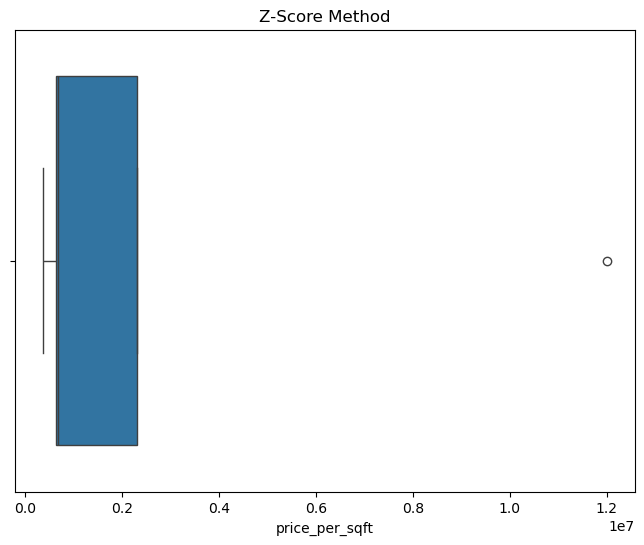

In [22]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df2_trimmed_z_score['price_per_sqft'])
plt.title('Z-Score Method')
plt.show()

In [23]:
# 4

# Skewness and Kurtosis BEFORE transformation
import scipy.stats as stats
original_skewness = stats.skew(df2['price_per_sqft'])
original_kurtosis = stats.kurtosis(df2['price_per_sqft'])

print("Original Skewness:", original_skewness)
print("Original Kurtosis:", original_kurtosis)

Original Skewness: 103.88920549434178
Original Kurtosis: 11131.230839805388


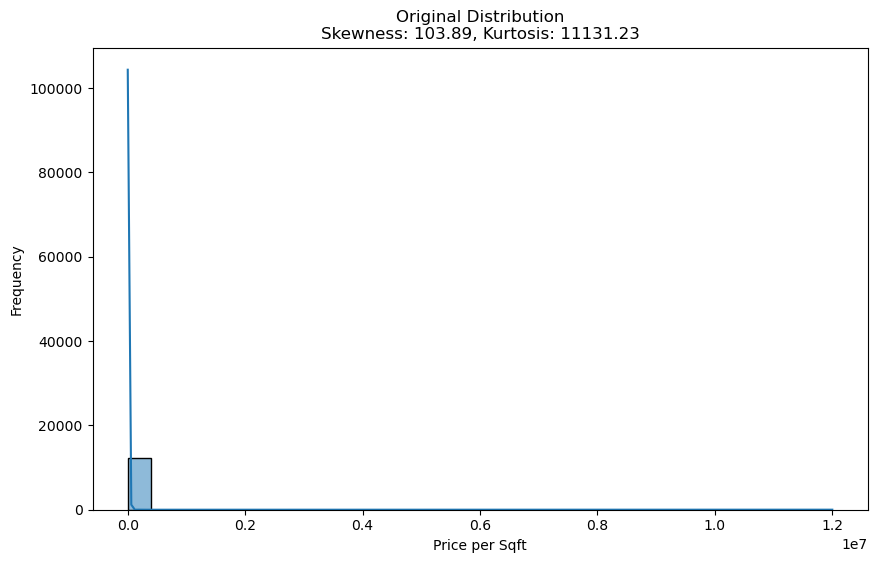

In [25]:
# Hisplot to check normality of price_per_sqft column
plt.figure(figsize=(10, 6))
sns.histplot(df2['price_per_sqft'], kde=True, bins=30)
plt.title(f'Original Distribution\nSkewness: {original_skewness:.2f}, Kurtosis: {original_kurtosis:.2f}')
plt.xlabel('Price per Sqft')
plt.ylabel('Frequency')
plt.show()

In [27]:
df2['log_price_per_sqft'] = np.log1p(df2['price_per_sqft'])

In [28]:
import scipy.stats as stats
log_skewness = stats.skew(df2['log_price_per_sqft'])
log_kurtosis = stats.kurtosis(df2['log_price_per_sqft'])

print("Log Transformation Skewness:", log_skewness)
print("Log Transformation Kurtosis:", log_kurtosis)

Log Transformation Skewness: 1.400870354404583
Log Transformation Kurtosis: 9.404434549652514


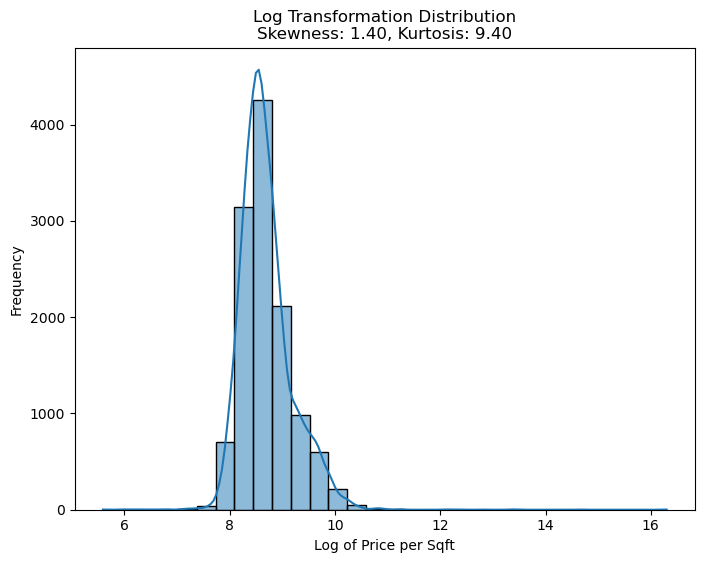

In [30]:
plt.figure(figsize=(8, 6))
sns.histplot(df2['log_price_per_sqft'], kde=True, bins=30)
plt.title(f'Log Transformation Distribution\nSkewness: {log_skewness:.2f}, Kurtosis: {log_kurtosis:.2f}')
plt.xlabel('Log of Price per Sqft')
plt.ylabel('Frequency')
plt.show()

In [32]:
# 5

df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12151 entries, 0 to 13198
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   location            12151 non-null  object 
 1   size                12151 non-null  object 
 2   total_sqft          12151 non-null  float64
 3   bath                12151 non-null  float64
 4   price               12151 non-null  float64
 5   bhk                 12151 non-null  int64  
 6   price_per_sqft      12151 non-null  int64  
 7   z_score             12151 non-null  float64
 8   log_price_per_sqft  12151 non-null  float64
dtypes: float64(5), int64(2), object(2)
memory usage: 949.3+ KB


In [33]:
num_columns = df2[['total_sqft', 'bath', 'price', 'bhk', 'price_per_sqft']]

# Calculating the correlation matrix
correlation_matrix = num_columns.corr()
correlation_matrix

,total_sqft,bath,price,bhk,price_per_sqft
total_sqft,1.000000,0.386694,0.572516,0.339936,-0.008877
bath,0.386694,1.000000,0.448802,0.898875,0.030133
price,0.572516,0.448802,1.000000,0.390008,0.027415
bhk,0.339936,0.898875,0.390008,1.000000,0.030294
price_per_sqft,-0.008877,0.030133,0.027415,0.030294,1.000000


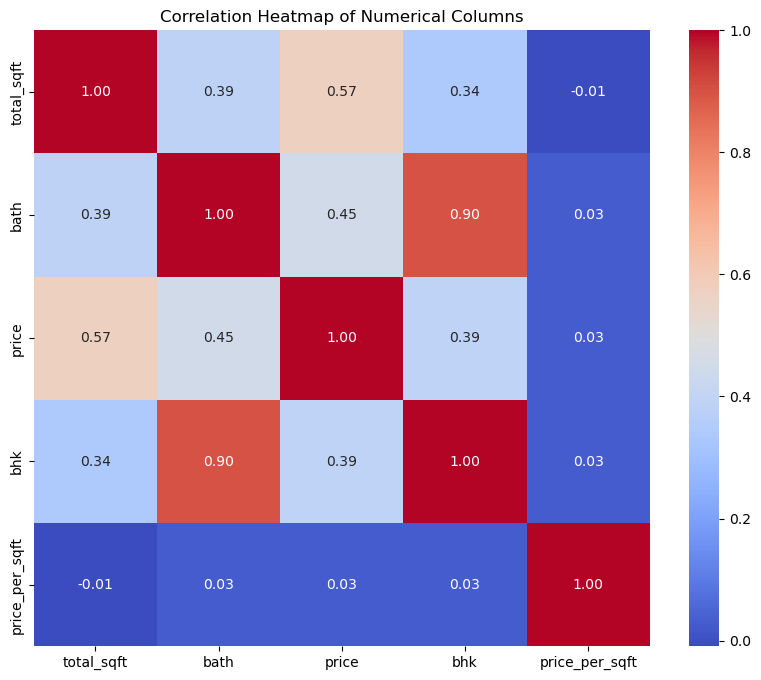

In [35]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

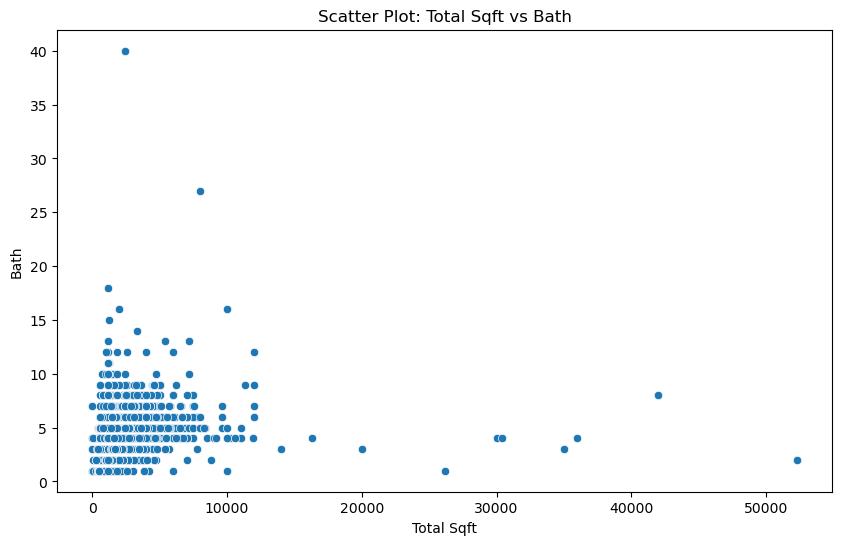

In [38]:
# 6


plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_sqft', y='bath',data=df2)
plt.title('Scatter Plot: Total Sqft vs Bath')
plt.xlabel('Total Sqft')
plt.ylabel('Bath')
plt.show()

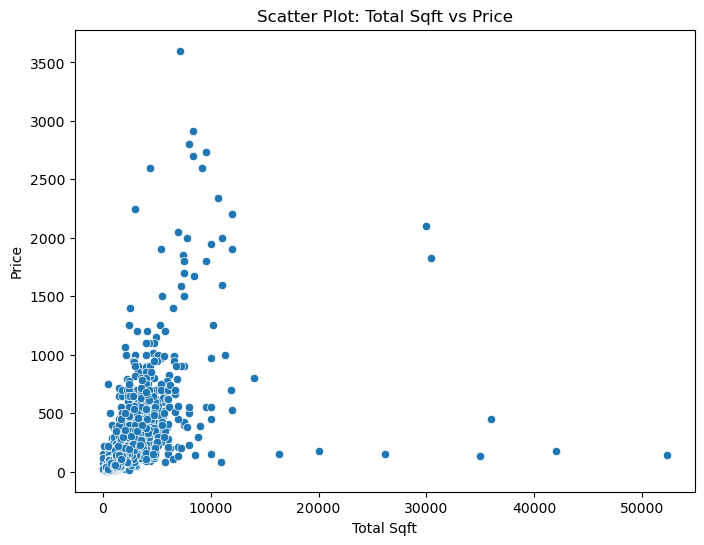

In [39]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_sqft', y='price',data=df2)
plt.title('Scatter Plot: Total Sqft vs Price')
plt.xlabel('Total Sqft')
plt.ylabel('Price')
plt.show()

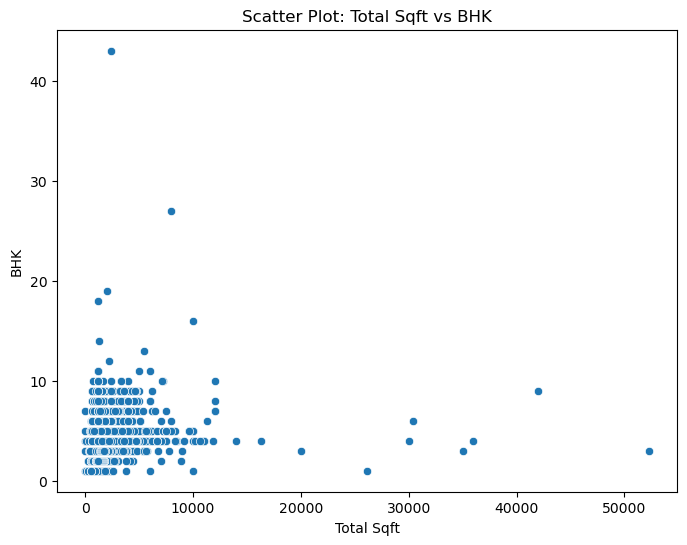

In [40]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_sqft', y='bhk',data=df2)
plt.title('Scatter Plot: Total Sqft vs BHK')
plt.xlabel('Total Sqft')
plt.ylabel('BHK')
plt.show()

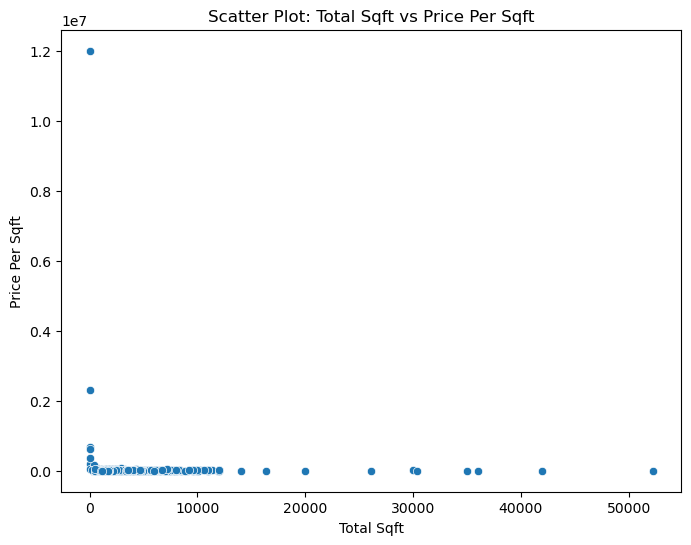

In [41]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_sqft', y='price_per_sqft',data=df2)
plt.title('Scatter Plot: Total Sqft vs Price Per Sqft')
plt.xlabel('Total Sqft')
plt.ylabel('Price Per Sqft')
plt.show()

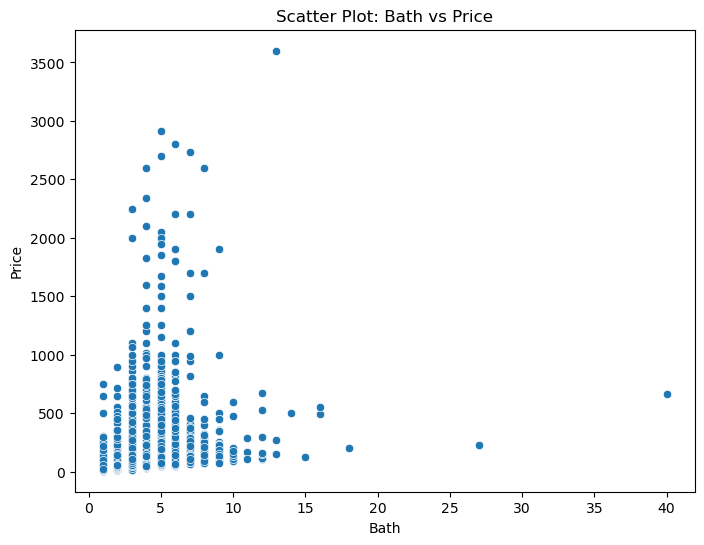

In [48]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bath', y='price',data=df2)
plt.title('Scatter Plot: Bath vs Price')
plt.xlabel('Bath')
plt.ylabel('Price')
plt.show()

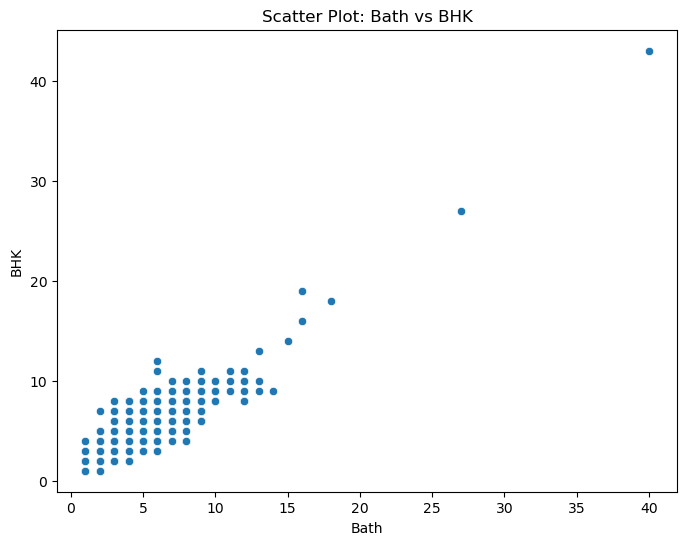

In [43]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bath', y='bhk',data=df2)
plt.title('Scatter Plot: Bath vs BHK')
plt.xlabel('Bath')
plt.ylabel('BHK')
plt.show()

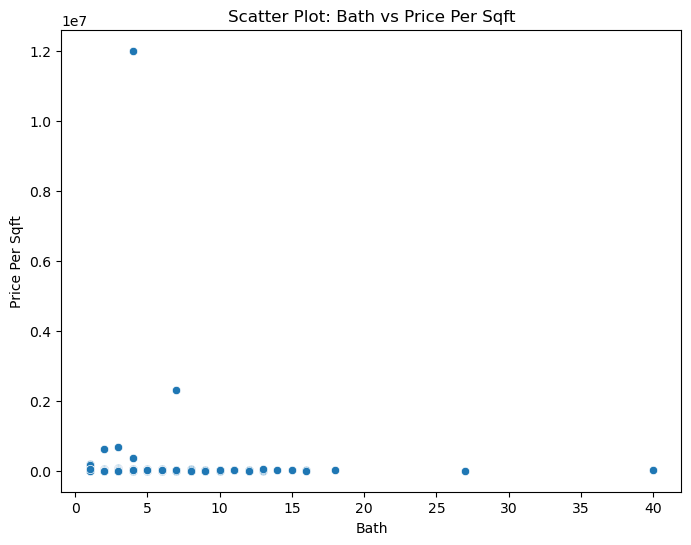

In [44]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bath', y='price_per_sqft',data=df2)
plt.title('Scatter Plot: Bath vs Price Per Sqft')
plt.xlabel('Bath')
plt.ylabel('Price Per Sqft')
plt.show()

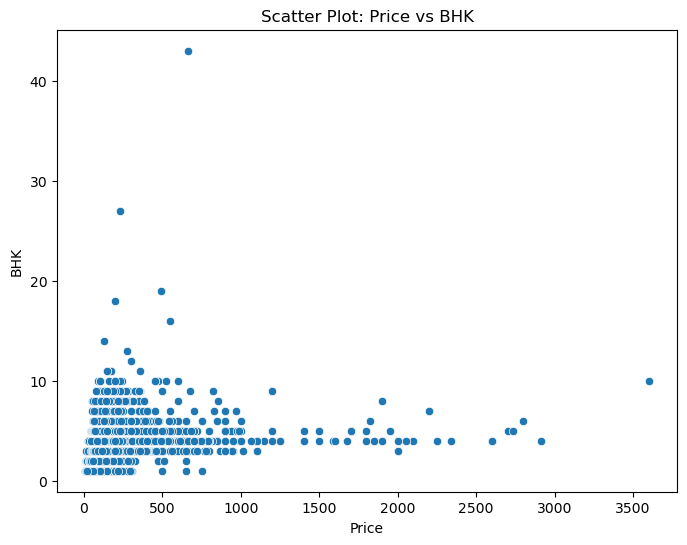

In [45]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='price', y='bhk',data=df2)
plt.title('Scatter Plot: Price vs BHK')
plt.xlabel('Price')
plt.ylabel('BHK')
plt.show()

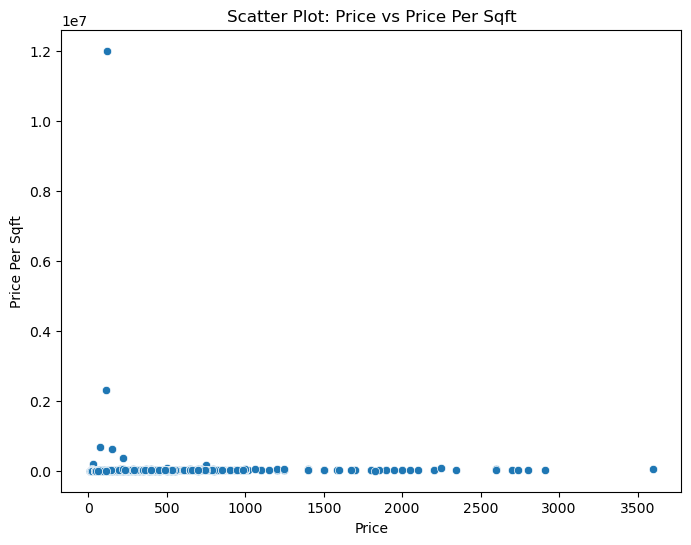

In [46]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='price', y='price_per_sqft',data=df2)
plt.title('Scatter Plot: Price vs Price Per Sqft')
plt.xlabel('Price')
plt.ylabel('Price Per Sqft')
plt.show()

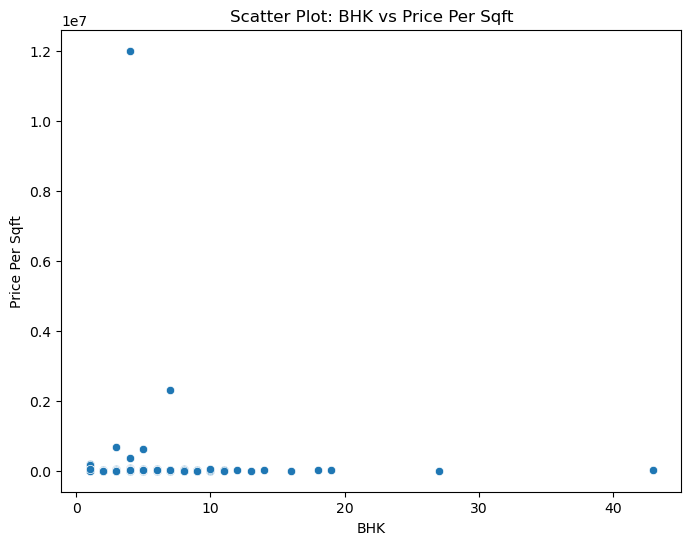

In [47]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bhk', y='price_per_sqft',data=df2)
plt.title('Scatter Plot: BHK vs Price Per Sqft')
plt.xlabel('BHK')
plt.ylabel('Price Per Sqft')
plt.show()